## Loading the Train dataset :
  - Checking the Info of the columns in the dataset.
  
## VISIT : https://github.com/Debjeet-Das/Bigmart-Outlet_Sales

In [1]:
import pandas as pd
import numpy as np

data= pd.read_csv("Train.csv")
print(data.shape)
print(data.info())

(8523, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB
None


## Missing values treatment and data cleaning :

In [2]:
# Replacing the duplicates with its original categories

data["Item_Fat_Content"] = data["Item_Fat_Content"].str.replace("reg","Regular")
data["Item_Fat_Content"] = data["Item_Fat_Content"].str.replace("LF","Low Fat")
data["Item_Fat_Content"] = data["Item_Fat_Content"].str.replace("low fat","Low Fat")
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [3]:
# Percentage of null values in each column:
data.isnull().sum()/len(data)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [4]:
!pip install missingpy

In [5]:
# Imputing the nan values using Knn Imputer for Item_Weight Column
from missingpy import KNNImputer
kn= KNNImputer(weights='distance')
new_weight= kn.fit_transform(data["Item_Weight"].values.reshape(-1,1))
data["Item_Weight"]=new_weight

C:\Users\Debjeet Das\Anaconda3\lib\site-packages\missingpy\knnimpute.py:224: UserWarning: There are rows with more than 50.0% missing values. These rows are not included as donor neighbors.
  .format(self.row_max_missing * 100))
C:\Users\Debjeet Das\Anaconda3\lib\site-packages\missingpy\knnimpute.py:282: UserWarning: There are rows with more than 50.0% missing values. The missing features in these rows are imputed with column means.
  .format(self.row_max_missing * 100))


In [6]:
# Substituting the missing values with mean for Item_Weight Column
data["Item_Weight"]=data["Item_Weight"].fillna(np.mean(data["Item_Weight"]))

In [7]:
#Imputing nan values using fillna "backwordFill" method and analysing the nature of Item_Outlet_Sales after Imputation.

data["Outlet_Size"]=data["Outlet_Size"].fillna(method="bfill")
data.pivot_table(index="Outlet_Size",values="Item_Outlet_Sales")

,Item_Outlet_Sales
Outlet_Size,
High,2147.162776
Medium,2441.709463
Small,1882.829379


In [8]:
data.isnull().sum()/len(data)*100

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

## Checking the Correlation :

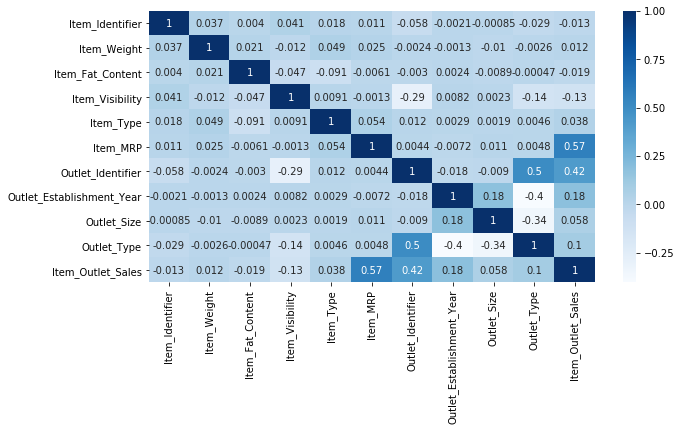

In [45]:
# This shoe the correlation through HeatMap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,cmap="Blues")
plt.show()

## Encoding the Categorical columns :
  - firstly calculated the frequency of each category.
  - Now substitude each category with its frequency.
  - Did the same for all the categorical variables and then label encoded it.
  - Now as the categories are already converted to a numerical value.
  - Now if we do label encoding, the labels will be given on the basis of the freq. i.e high freq. will get higher value.
  - This will depict that the categories with high frequency has more importance and reducing there after for other categories.
  - Now use these features for further modelling .

In [10]:
# substituting the outletType with the its frequency of each category
OutletType=data["Outlet_Type"].value_counts()
data["Outlet_Type"]=data["Outlet_Type"].map(OutletType)
data["Outlet_Type"]

0       5577
1        928
2       5577
3       1083
4       5577
5        928
6       5577
7        935
8       5577
9       5577
10      5577
11      5577
12      5577
13      5577
14      5577
15      5577
16       928
17      5577
18       935
19      5577
20      5577
21       935
22      5577
23      1083
24      5577
25      5577
26      5577
27      5577
28      1083
29      1083
        ... 
8493    5577
8494    5577
8495    5577
8496    5577
8497    5577
8498     928
8499    5577
8500    5577
8501    5577
8502    5577
8503    5577
8504     935
8505     928
8506     928
8507    5577
8508    5577
8509    1083
8510    5577
8511     928
8512    5577
8513    5577
8514    5577
8515     928
8516     928
8517    5577
8518    5577
8519    5577
8520    5577
8521     928
8522    5577
Name: Outlet_Type, Length: 8523, dtype: int64

In [11]:
# substituting the Outlet_Size with the its frequency of each category
OutletSize=data["Outlet_Size"].value_counts()
data["Outlet_Size"]=data["Outlet_Size"].map(OutletSize)

In [12]:
# substituting the Item_Fat_Content with the its frequency of each category
Item_Fat_Content=data["Item_Fat_Content"].value_counts()
data["Item_Fat_Content"]=data["Item_Fat_Content"].map(Item_Fat_Content)

In [13]:
#converting date to age of Outlet
data["Outlet_Establishment_Year"]= data["Outlet_Establishment_Year"].apply(lambda x : 2009 - x)

In [14]:
# substituting the Outlet_Establishment_Year with the its frequency of each category
Outlet_Establishment_Year=data["Outlet_Establishment_Year"].value_counts()
data["Outlet_Establishment_Year"]=data["Outlet_Establishment_Year"].map(Outlet_Establishment_Year)

In [15]:
# substituting the Outlet_Identifier with the its frequency of each category
Outlet_Identifier=data["Outlet_Identifier"].value_counts()
data["Outlet_Identifier"]=data["Outlet_Identifier"].map(Outlet_Identifier)

In [16]:
# substituting the Item_Identifier with the its frequency of each category
Item_Identifier=data["Item_Identifier"].value_counts()
data["Item_Identifier"]=data["Item_Identifier"].map(Item_Identifier)

In [17]:
# substituting the Item_Identifier with the its frequency of each category
Item_Type=data["Item_Type"].value_counts()
data["Item_Type"]=data["Item_Type"].map(Item_Type)

## Segregating the Target and Independent features.
   - Here IV,DV are the features without log Transform.
   - And the Log_IV ,Log_Dv are the log transformed features.

In [18]:
DV = data["Item_Outlet_Sales"]

In [19]:
IV=data[["Item_Type","Item_MRP","Outlet_Identifier","Outlet_Establishment_Year","Outlet_Type","Outlet_Size","Item_Fat_Content"]]

In [20]:
# Log transformed Dependent Variable
Log_DV = data["Item_Outlet_Sales"].apply(lambda x : np.log(x+1))

In [21]:
# Log transformed Independent Variable
Log_IV=data[["Item_Type","Item_MRP","Outlet_Identifier","Outlet_Establishment_Year","Outlet_Type","Outlet_Size","Item_Fat_Content"]].apply(lambda x : np.log(x+1)) 

## Plotting the graphs to see the skewness and outliers in  the Dataset :
  - Using distplot from seaborn library for determing the skewness in th data.
  - And boxplot to identify the outliers in the features.

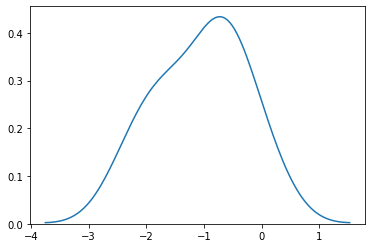

In [22]:
# This graph shows the skewness of the features after Log transform
import seaborn as sns
sns.distplot(Log_IV.skew(),hist=False)

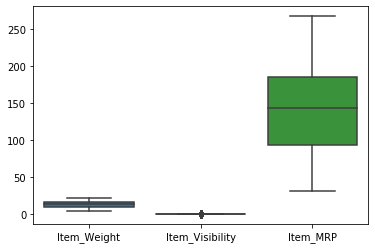

In [23]:
# skewness means there might be outliers in the dataset too.
# Thus checking the numerical variables wether it has outliers

box_data=data[["Item_Weight","Item_Visibility","Item_MRP"]]
sns.boxplot(data=box_data,orient="v")

## Fitting the Linear Model :
   - Linear model fitting with log transformed feartures.
   - Plotted the coef_ values.
   - Plotted the Residue plot.

In [24]:
#Linear regression
#After log transformation on Independent and Dependent Variables

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression

train_x,test_x,train_y,test_y=train_test_split(Log_IV,Log_DV,test_size=0.2,random_state=3)
lr= LinearRegression()
lr.fit(train_x,train_y)
y_pred=lr.predict(test_x)
r2scores= r2_score(test_y,y_pred)
rmses= sqrt(mean_squared_error(test_y,y_pred))
print("r2scores : ",r2scores)
print("rmses : ",rmses)

r2scores :  0.7563076189292287
rmses :  0.5194912998237238


Item_Fat_Content            -0.029298
Outlet_Type                 -0.019332
Item_Type                   -0.016272
Outlet_Size                  0.024901
Outlet_Establishment_Year    0.544679
Item_MRP                     1.023305
Outlet_Identifier            3.610911
dtype: float64


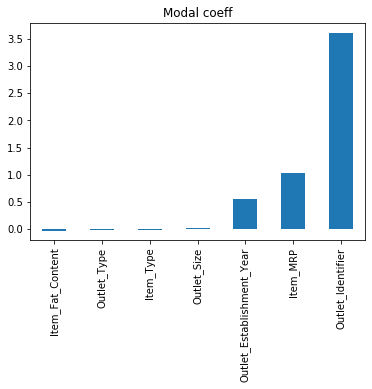

In [25]:
# plotting the coef_ bar graph

%matplotlib inline
iv=train_x.columns
coef1= lr.coef_
coef_col1=pd.Series(coef1,iv).sort_values()
print(coef_col1)
coef_col1.plot(kind="bar",title="Modal coeff")

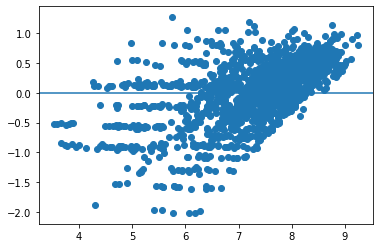

In [26]:
# Residue plot after Log transformed Variables

residue = test_y - y_pred
import matplotlib.pyplot as plt
plt.scatter(test_y,residue)
plt.axhline(y=0)

## Fitting the Linear Model:
   - This model is fitted without Log transformed Features.

In [27]:
#Linear regression
#Without Log Transformation

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression
trainx,testx,trainy,testy=train_test_split(IV,DV,test_size=0.2,random_state=3)
LR= LinearRegression()
LR.fit(trainx,trainy)
y_predict=LR.predict(testx)
r2score= r2_score(testy,y_predict)
rmse= sqrt(mean_squared_error(testy,y_predict))
print("r2scores : ",r2score)
print("rmses : ",rmse)

r2scores :  0.5653459704855344
rmses :  1137.6747875341282


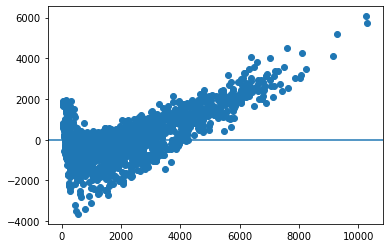

In [28]:
# Residue plot after Log transformed Variables
res = testy - y_predict
import matplotlib.pyplot as plt
plt.scatter(testy,res)
plt.axhline(y=0)

## Using Regularisation Techniques:
   - Used Ridge & Lasso with different alpha values.
   - Also created a dataframe with Alpha values and r2_score for comparision.
   - Plotted the Modal coef_ graph to see the affect on the features after regularisation.

#### Ridge :

In [29]:
# Ridge
# after log transformation applied on IV & DV

from sklearn.linear_model import Ridge , Lasso
list1=[0.0018,0.002,0.005,0.08,0.09,0.1,0.5]
list2=[]
for i in list1:
    ridge_reg = Ridge(alpha=i,normalize=True)
    trainxr,testxr,trainyr,testyr=train_test_split(Log_IV,Log_DV,test_size=0.2,random_state=3)
    ridge_reg.fit(trainxr,trainyr)
    y_pred_r=ridge_reg.predict(testxr)
    r2score_r= r2_score(testyr,y_pred_r)
    list2.append(r2score_r)

ridge_rscore_df=pd.DataFrame({"ALPHA":list1,"R2SCORE":list2})
ridge_rscore_df 

,ALPHA,R2SCORE
0,0.0018,0.756171
1,0.0020,0.756155
2,0.0050,0.755916
3,0.0800,0.746820
4,0.0900,0.745258
5,0.1000,0.743634
6,0.5000,0.659535


Item_Fat_Content            -0.023984
Item_Type                   -0.002113
Outlet_Size                  0.055834
Outlet_Type                  0.081401
Outlet_Establishment_Year    0.500215
Item_MRP                     0.681086
Outlet_Identifier            2.266675
dtype: float64


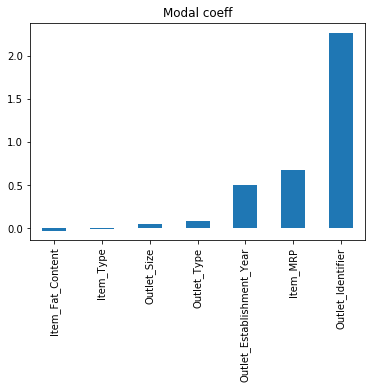

In [30]:
# plotting the coef_ bar graph for ridge

%matplotlib inline
riv=trainxr.columns
coef2= ridge_reg.coef_
coef_col2=pd.Series(coef2,riv).sort_values()
print(coef_col2)
coef_col2.plot(kind="bar",title="Modal coeff")

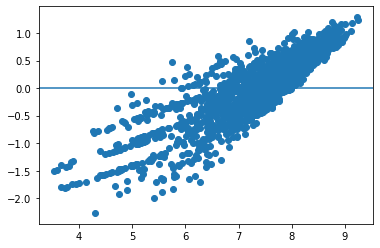

In [31]:
# Residue plot for Ridge
resr = testyr - y_pred_r
import matplotlib.pyplot as plt
plt.scatter(testyr,resr)
plt.axhline(y=0)

#### Lasso :

In [32]:
# Lasso 
# after log transformation applied on IV & DV


list1L=[0.00185,0.002,0.005,0.08,0.09,0.1,0.5]
list2L=[]
for i in list1L:
    lasso_reg = Lasso(alpha=i)
    trainxl,testxl,trainyl,testyl=train_test_split(Log_IV,Log_DV,test_size=0.2)
    lasso_reg.fit(trainxl,trainyl)
    y_pred_l=lasso_reg.predict(testxl)
    r2score_l= r2_score(testyl,y_pred_l)
    list2L.append(r2score_l)

lasso_rscore_df=pd.DataFrame({"ALPHA":list1L,"R2SCORE":list2L})
lasso_rscore_df

,ALPHA,R2SCORE
0,0.00185,0.719669
1,0.00200,0.715368
2,0.00500,0.733577
3,0.08000,0.467184
4,0.09000,0.430685
5,0.10000,0.338423
6,0.50000,-0.000290


Outlet_Type                 -0.016181
Item_Fat_Content            -0.008661
Item_Type                   -0.000000
Outlet_Size                  0.022261
Outlet_Establishment_Year    0.527486
Item_MRP                     1.019017
Outlet_Identifier            3.591142
dtype: float64


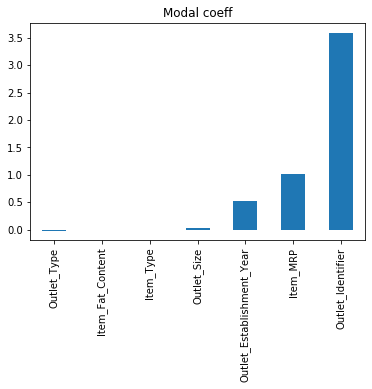

In [33]:
# plotting the coef_ bar graph for Lasso

%matplotlib inline
lasso_reg1 = Lasso(alpha=0.002)
trainxl1,testxl1,trainyl1,testyl1=train_test_split(Log_IV,Log_DV,test_size=0.2)
lasso_reg1.fit(trainxl1,trainyl1)
y_pred_l1=lasso_reg1.predict(testxl1)
r2score_l1= r2_score(testyl1,y_pred_l1)
list2L.append(r2score_l1)
liv=trainxl1.columns
coef3= lasso_reg1.coef_
coef_col3=pd.Series(coef3,liv).sort_values()
print(coef_col3)
coef_col3.plot(kind="bar",title="Modal coeff")


## Overview:
  - On the basis of above observations of fitting the models we come to a conclusion with following points :
     - After Log transformation the model was predicting more accurately.
     - Using these transformed values Linear Reggression gave highest r2_score of 0.7563
     - Whereas using Ridge & Lasso gave the highest r2_score as 0.7561 and 0.7378 respectively.
  - Thus it is concluded that Linear regression is performing better for this dataset.
  - Hence we will use Linear regression for fitting the model using Test.csv Dataset as its test Input.

## Loading Test Data:



In [34]:
import pandas as pd
testdata = pd.read_csv("Test.csv")

## Data cleaning for the test dataset :

In [35]:
# Replacing the duplicates with its original categories

testdata["Item_Fat_Content"] =testdata["Item_Fat_Content"].str.replace("reg","Regular")
testdata["Item_Fat_Content"] =testdata["Item_Fat_Content"].str.replace("LF","Low Fat")
testdata["Item_Fat_Content"] =testdata["Item_Fat_Content"].str.replace("low fat","Low Fat")
testdata["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [36]:
# Imputing the nan values using Knn Imputer for the Item_weight col.
from missingpy import KNNImputer
kn1=KNNImputer(weights='distance')
new_weight1=kn1.fit_transform(testdata["Item_Weight"].values.reshape(-1,1))
testdata["Item_Weight"]=new_weight1

C:\Users\Debjeet Das\Anaconda3\lib\site-packages\missingpy\knnimpute.py:224: UserWarning: There are rows with more than 50.0% missing values. These rows are not included as donor neighbors.
  .format(self.row_max_missing * 100))
C:\Users\Debjeet Das\Anaconda3\lib\site-packages\missingpy\knnimpute.py:282: UserWarning: There are rows with more than 50.0% missing values. The missing features in these rows are imputed with column means.
  .format(self.row_max_missing * 100))


In [37]:
#Imputing nan values using fillna "backwordFill" method and analysing the nature of Item_Outlet_Sales after Imputation.

testdata["Outlet_Size"]=testdata["Outlet_Size"].fillna(method="ffill")

In [38]:
# Null values in the test dataset
testdata.isnull().sum()/len(testdata)*100

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
dtype: float64

## Model fitting Using Linear Regression :
   - First converted the categorical to numerical values using the observed computations above.
   - Then Fitting the Model with the best fitted model with high r2_score.
   - Predicting the Outlet_Sales for the given dataset of variables.

In [39]:
# substituting the outletType with the its frequency of each category
OutletType1=testdata["Outlet_Type"].value_counts()
testdata["Outlet_Type"]=testdata["Outlet_Type"].map(OutletType1)
testdata["Outlet_Type"]

# substituting the Outlet_Size with the its frequency of each category
OutletSize1=testdata["Outlet_Size"].value_counts()
testdata["Outlet_Size"]=testdata["Outlet_Size"].map(OutletSize1)

# substituting the Item_Fat_Content with the its frequency of each category
Item_Fat_Content1=testdata["Item_Fat_Content"].value_counts()
testdata["Item_Fat_Content"]=testdata["Item_Fat_Content"].map(Item_Fat_Content1)

#converting date to age of Outlet
testdata["Outlet_Establishment_Year"]= testdata["Outlet_Establishment_Year"].apply(lambda x : 2009 - x)


# substituting the Outlet_Establishment_Year with the its frequency of each category
Outlet_Establishment_Year1=testdata["Outlet_Establishment_Year"].value_counts()
testdata["Outlet_Establishment_Year"]=testdata["Outlet_Establishment_Year"].map(Outlet_Establishment_Year1)

# substituting the Outlet_Identifier with the its frequency of each category
Outlet_Identifier1=testdata["Outlet_Identifier"].value_counts()
testdata["Outlet_Identifier"]=testdata["Outlet_Identifier"].map(Outlet_Identifier1)

# substituting the Item_Identifier with the its frequency of each category
Item_Identifier1=testdata["Item_Identifier"].value_counts()
testdata["Item_Identifier"]=testdata["Item_Identifier"].map(Item_Identifier1)

# substituting the Item_Identifier with the its frequency of each category
Item_Type1=testdata["Item_Type"].value_counts()
testdata["Item_Type"]=testdata["Item_Type"].map(Item_Type1)


# Log transformed Dependent Variable
Log_DV1 = data["Item_Outlet_Sales"].apply(lambda x : np.log(x+1))

# Log transformed Independent Variable
Log_IV1 =testdata[["Item_Type","Item_MRP","Outlet_Identifier","Outlet_Establishment_Year","Outlet_Type","Outlet_Size","Item_Fat_Content"]].apply(lambda x : np.log(x+1)) 

#Linear regression
#After log transformation on Independent and Dependent Variables

from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression

lr1= LinearRegression()
lr1.fit(Log_IV,Log_DV)
y_pred1=lr1.predict(Log_IV1)

## Adding the predicted values to the test.csv dataframe:
  - Reconverted the log transformed predicted values to its original outlet_sales value range.
  - Then added that as a column in the test dataset.

In [40]:
# creating a new column in the test dataset with predicted values
testdata["pred_sales"]=np.exp(y_pred1+1)

In [46]:
# Final dataset with predicted outlet Sales values in the pred_sales column
testdata["pred_sales"]

0        780.151812
1        627.009906
2        212.430733
3       1107.631362
4       2403.873575
5        856.850571
6        373.164701
7        801.082416
8        695.804585
9       1346.188057
10       840.383621
11       610.651707
12       298.893994
13       895.594550
14       368.062634
15      1124.764991
16      1479.187235
17      1452.622390
18      1087.947794
19       167.232029
20      1254.091482
21      1781.820655
22       339.976540
23       175.879949
24      1316.693097
25       182.916757
26       338.758817
27      1174.069067
28      1802.498325
29       840.530806
           ...     
5651    1370.655479
5652     889.387397
5653     582.924238
5654    1031.229644
5655    1451.994503
5656    2096.850608
5657    1922.060106
5658     877.537381
5659    1392.540901
5660    1551.390203
5661    1565.351491
5662    1543.986601
5663     539.368943
5664    1325.516701
5665     451.735393
5666    1457.860106
5667     588.122354
5668      97.758293
5669    1886.252125


# Overall Summary :
## Null value identification :
   - Here we can see that there are Nan values in Item_Weight & Outlet_Size.
   - There is 17.16% of nan value out of the total values in the Item_weight column.
   - There is 28.27% of nan value out of the total values in the Outlet_Size column.
     
## Data Cleaning :
   - Replacing the duplicates with its original categories in the Item_Fat_Content column.
   - Imputing the Null Values in the Item_Weight column by using KNN Imputation.
   - Also Imputing Item_Weight  nan values with its mean to see the comparision which imputarion got better results.
   - Imputing the Null Values in the Outlet_Size column by using fillna "Backward Fill" method.
   - After Imputation we analyse that the nature of Item_Outlet_Sales on compared with the target variable is the same.
   - After the above imputations were done,the null value percentage  in the dataset was 0% in all the variables.
     
## Encoding on categorical variables :
   - We see there are 8 categorical variables in this dataset.
   - These Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Type,Outlet_Size,Item_Fat_Content showed high corr.
   - Thus the categorical values were substituted by its frequency count cotegorically.
   - After this the features were label encoded so that high freq. categories get higher label encoded values.
   - Thus the machine will understand that the labels with higher values have higher weightage in the dataset.

## Checking the Correlation :
   - Using heatmap we were able to recognise which features are more correlated with the Target Variable.
   - These Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Type,Outlet_Size,Item_Fat_Content showed high corr.
   - Hence used these variables for model prediction.
     
## Skewness analysis and Treatment :
   - By using distplot from the seaborn Lib. ,plotted a distPlot so as to see the skewness of the data visually.
   - We chechked the skewness of the data and then analysed that the varibales were heavily left skewed.
   - Thus applied Log transform on the varaibles to make them follow a distribution close to normal distribution.

## Outlier Identification :
   - If there is skewness in the data, that means there can be outliers too in the dataset.
   - Thus we created a boxplot to ensure if there are any outliers in the variables.
   - according to the box plot there were no such outliers which will agffect the prediction of our model.

## Fitting the Model :    
   - First we tried fitting the model with the skewed data.
   - The prediction outcome of the highly skewed data was very poor.Also the residue plot was not showing linearity. 
   - Then we used the log transformed data for prediction and as the data was trying to follow normal distribution.
   - The r2_score for this model raised exponentially.
   - Thus We can say that the predictions were better after transformation.
   - Before log transfrom the r2_score was coming about 0.5471 and After Log transform it raised upto 0.75637
   - Also the rmse Value was 1109.4580 and 0.52802 respectively.

## Regulariztion Techniques :
   - After the log transformation of data we tried the L1, L2 regularization techniques to see if the accuracy increases.
   - Applied Ridge regularisation with various alpha values and formed a dataframe using those alpha and r2_score.
   - Also tried Lasso with various alpha values and compared the r2_score for each alpha values and stored it in a DF.
   - On the basis of that comparision, it is clear that After regulariztion techniques the accuracy reduced.
   - Thus the Linear regression model showed better accuracy for the above dataset.
   - Also plotted the modal coef_ graph for Lasso and Ridge to see how the coef_ or weights got reduced.
   
## Prediction on the Test.csv Dataset :
   - Loaded the dataset and performed all the imputation and missing values treatment using the same method as on train.csv
   - Fitted the model using the selected features from above observation.
   - As the values were previously log transformed hence converted it back to its original values by applying exponential.
   - After getting the predicted values for the test.csv dataset, added a new column with name pred_sales.
   - pred_sales in this test.csv dataset shows the predicted values on the basis of the given inputs.
   
## Final r2_scores:
   ### Linear Regression = 0.7563
   ### Lasso (alpha: 0.005 ) = 0.7378
   ### Ridge (alpha: 0.0018 ) = 0.7561